In [70]:
!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py"
!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py"
!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkstats2.py"

--2020-05-04 16:16:48--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48075 (47K) [text/plain]
Saving to: ‘thinkdsp.py.1’

thinkdsp.py.1       100%[===================>]  46.95K  --.-KB/s    in 0.02s   

2020-05-04 16:16:48 (1.86 MB/s) - ‘thinkdsp.py.1’ saved [48075/48075]

--2020-05-04 16:16:50--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22756 (22K) [text/plain]
Saving to: 

Exercise1:``A Soft Murmur'' is a web site that plays a mixture of natural noise sources, including rain, waves, wind, etc. At http://asoftmurmur.com/about/ you can find their list of recordings, most of which are at http://freesound.org.

Download a few of these files and compute the spectrum of each signal. Does the power spectrum look like white noise, pink noise, or Brownian noise? How does the spectrum vary over time?

In [0]:

from __future__ import print_function, division

import thinkdsp
import thinkplot
import thinkstats2

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

%matplotlib inline

In [36]:
import IPython.display as dp

url1= 'https://freesound.org/people/Soarer/sounds/13793/download/13793__soarer__north-sea.wav'

dp.Audio(url= url1)

In [0]:
#wfn= '132736__ciccarelli__ocean-waves.wav'
wfn= '13793__soarer__north-sea.wav'
wave = thinkdsp.read_wave(wfn)
wave.make_audio()

In [27]:
segment = wave.segment(start= 10, duration=1.0)
segment.make_audio()

(10.0, 11.0)

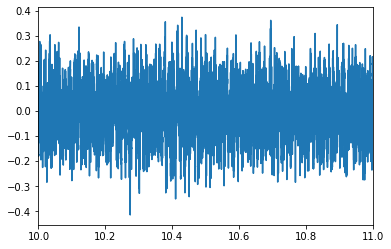

In [28]:
segment.plot()
import matplotlib.pyplot as pl
pl.xlim([10.0,11])

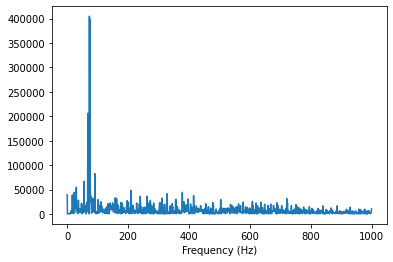

In [29]:
spectrum = segment.make_spectrum()
spectrum.plot_power(high=1000)
thinkplot.config(xlabel='Frequency (Hz)')

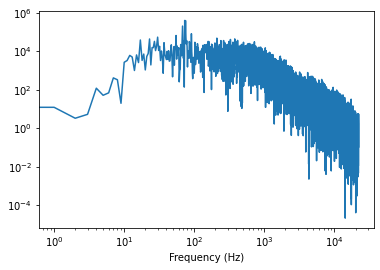

In [30]:
spectrum.plot_power()
thinkplot.config(xlabel='Frequency (Hz)',
                 xscale='log', 
                 yscale='log')

In [31]:

segment2 = wave.segment(start=20, duration=1.0)
segment2.make_audio()

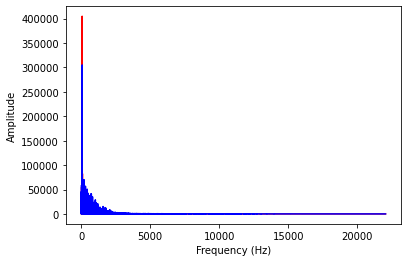

In [32]:
spectrum2 = segment2.make_spectrum()
spectrum.plot_power(color='red')
spectrum2.plot_power(color='blue')
thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude')

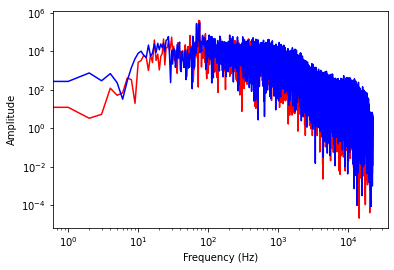

In [33]:

spectrum.plot_power(color='red')
spectrum2.plot_power(color='blue')
thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude',
                 xscale='log', 
                 yscale='log')

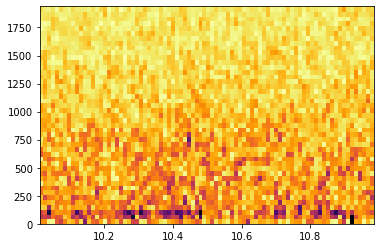

In [34]:
segment.make_spectrogram(1024).plot(high=2000)

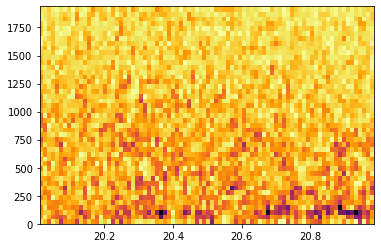

In [35]:
segment2.make_spectrogram(1024).plot(high=2000)

Exercise2: In a noise signal, the mixture of frequencies changes over time. In the long run, we expect the power at all frequencies to be equal, but in any sample, the power at each frequency is random.

To estimate the long-term average power at each frequency, we can break a long signal into segments, compute the power spectrum for each segment, and then compute the average across the segments. You can read more about this algorithm at http://en.wikipedia.org/wiki/Bartlett's_method.

Bartlett’s method consists of the following steps:

The original N point data segment is split up into K (non-overlapping) data segments, each of length M
For each segment, compute the periodogram by computing the discrete Fourier transform (DFT version which does not divide by M), then computing the squared magnitude of the result and dividing this by M.
Average the result of the periodograms above for the K data segments.

The averaging reduces the variance, compared to the original N point data segment.
The end result is an array of power measurements vs. frequency "bin".

In [0]:
def bartlett_method(wave, seg_length=512, win_flag=True):
    """Estimates the power spectrum of a noise wave.
    
    wave: Wave
    seg_length: segment length
    """
    # make a spectrogram and extract the spectrums
    spectro = wave.make_spectrogram(seg_length, win_flag)
    spectrums = spectro.spec_map.values()
    
    # extract the power array from each spectrum
    psds = [spectrum.power for spectrum in spectrums]
    
    # compute the root mean power (which is like an amplitude)
    hs = np.sqrt(sum(psds) / len(psds))
    
    fs = next(iter(spectrums)).fs  
    
    # make a Spectrum with the mean amplitudes
    spectrum = thinkdsp.Spectrum(hs, fs, wave.framerate)
    return spectrum

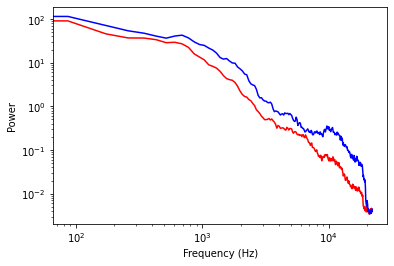

In [39]:

psd=  bartlett_method(segment)
psd2= bartlett_method(segment2)

psd.plot_power(color='red')
psd2.plot_power(color='blue')

thinkplot.config(xlabel='Frequency (Hz)', 
                 ylabel='Power', 
                 xscale='log', 
                 yscale='log')

Exercise3: At http://www.coindesk.com you can download the daily price of a BitCoin as a CSV file. Read this file and compute the spectrum of BitCoin prices as a function of time. Does it resemble white, pink, or Brownian noise?

In [0]:

#oriCsv= 'coindesk-bpi-USD-close.csv'
ryCsv=  'BTC_USD_2013-10-01_2020-04-30-CoinDesk.csv'

In [57]:
df = pd.read_csv(ryCsv) #, nrows=1625, parse_dates=[0])
df.head()

,Currency,Date,ClosingPrice(USD),24hOpen(USD),24hHigh(USD),24hLow(USD)
0,BTC,2013/10/1,123.65499,124.30466,124.75166,122.56349
1,BTC,2013/10/2,125.45500,123.65499,125.75850,123.63383
2,BTC,2013/10/3,108.58483,125.45500,125.66566,83.32833
3,BTC,2013/10/4,118.67466,108.58483,118.67500,107.05816
4,BTC,2013/10/5,121.33866,118.67466,121.93633,118.00566


In [58]:
df.columns

Index(['Currency', 'Date', 'ClosingPrice(USD)', '24hOpen(USD)', '24hHigh(USD)',
       '24hLow(USD)'],
      dtype='object')

In [0]:
ys = df['ClosingPrice(USD)'].values
ts = np.arange(len(ys)) #df['Date'].values

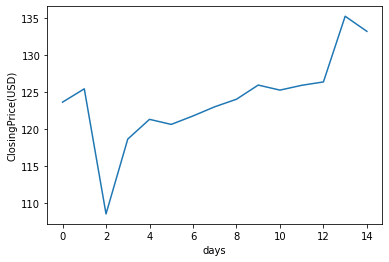

In [62]:

wave = thinkdsp.Wave(ys, ts, framerate=1)
wave.plot()
thinkplot.config(ylabel='ClosingPrice(USD)')
thinkplot.config(xlabel='days') #'Time (days)')

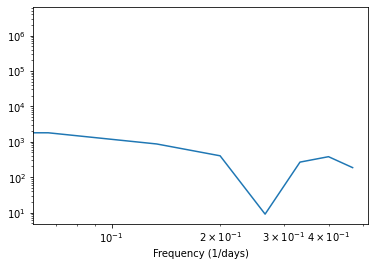

In [63]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
thinkplot.config(xlabel='Frequency (1/days)',
                 xscale='log', yscale='log')

In [64]:

spectrum.estimate_slope()

LinregressResult(slope=-1.2863088725870149, intercept=3.6794268258392995, rvalue=-0.5249476154862681, pvalue=0.22635503711150592, stderr=0.9327011442634655)

Exercise5: The algorithm in this chapter for generating pink noise is conceptually simple but computationally expensive. There are more efficient alternatives, like the Voss-McCartney algorithm. Research this method, implement it, compute the spectrum of the result, and confirm that it has the desired relationship between power and frequency.

In [81]:
nrows = 100
ncols = 5

array = np.empty((nrows, ncols))
array.fill(np.nan)
array[0, :] = np.random.random(ncols)
array[:, 0] = np.random.random(nrows)
array[0:6]

array([[0.91939575, 0.26691702, 0.54635431, 0.44238049, 0.69308795],
       [0.20460228,        nan,        nan,        nan,        nan],
       [0.30828813,        nan,        nan,        nan,        nan],
       [0.09566887,        nan,        nan,        nan,        nan],
       [0.715182  ,        nan,        nan,        nan,        nan],
       [0.34362453,        nan,        nan,        nan,        nan]])

In [82]:

p = 0.5
n = nrows
cols = np.random.geometric(p, n)
cols[cols >= ncols] = 0
cols


array([3, 1, 1, 3, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 2, 2, 3, 1, 2,
       1, 2, 1, 3, 1, 2, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 1, 0, 1, 4, 1, 2, 3, 1, 1, 1, 1, 3, 4, 1, 1, 1, 1,
       0, 2, 1, 2, 1, 2, 0, 0, 1, 1, 3, 0, 2, 3, 1, 1, 1, 3, 1, 3, 2, 4,
       2, 1, 2, 1, 2, 1, 1, 3, 4, 1, 2, 1])

In [83]:

rows = np.random.randint(nrows, size=n)
rows

array([58, 10, 45, 81, 76, 45, 50,  0, 16, 45, 72, 46, 83, 76, 10, 90, 72,
       59, 90, 81, 64, 64, 28, 81, 50, 91, 93, 22, 42, 73, 23, 98, 79,  8,
       43, 97,  3, 16, 39, 18, 37, 38, 30, 80, 40, 33, 92, 46, 57, 91, 96,
        8, 62, 49, 33, 30, 22, 71, 34, 79, 75, 72, 58, 82,  7, 29, 78, 88,
       27, 57, 21, 30, 46, 67, 94, 87, 41, 91, 13, 92,  9, 17, 49, 33, 62,
       86, 42, 21, 76, 84, 95, 90, 84, 62, 64, 41, 97, 73, 51, 35])

In [84]:
array[rows, cols] = np.random.random(n)
array[0:6]

array([[0.91939575, 0.55587549, 0.54635431, 0.44238049, 0.69308795],
       [0.20460228,        nan,        nan,        nan,        nan],
       [0.30828813,        nan,        nan,        nan,        nan],
       [0.09566887, 0.23788127,        nan,        nan,        nan],
       [0.715182  ,        nan,        nan,        nan,        nan],
       [0.34362453,        nan,        nan,        nan,        nan]])

In [85]:
df = pd.DataFrame(array)
df.head()

,0,1,2,3,4
0,0.919396,0.555875,0.546354,0.44238,0.693088
1,0.204602,NaN,NaN,NaN,NaN
2,0.308288,NaN,NaN,NaN,NaN
3,0.095669,0.237881,NaN,NaN,NaN
4,0.715182,NaN,NaN,NaN,NaN


In [86]:

filled = df.fillna(method='ffill', axis=0)
filled.head()

,0,1,2,3,4
0,0.919396,0.555875,0.546354,0.44238,0.693088
1,0.204602,0.555875,0.546354,0.44238,0.693088
2,0.308288,0.555875,0.546354,0.44238,0.693088
3,0.095669,0.237881,0.546354,0.44238,0.693088
4,0.715182,0.237881,0.546354,0.44238,0.693088


In [87]:
total = filled.sum(axis=1)
total.head()

0    3.157094
1    2.442301
2    2.545986
3    2.015373
4    2.634886
dtype: float64

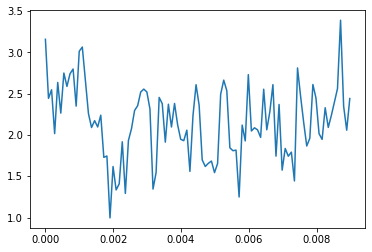

In [88]:

wave = thinkdsp.Wave(total.values)
wave.plot()

In [0]:

def voss(nrows, ncols=16):
    """Generates pink noise using the Voss-McCartney algorithm.
    
    nrows: number of values to generate
    rcols: number of random sources to add
    
    returns: NumPy array
    """
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    
    # the total number of changes is nrows
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values

In [90]:

ys = voss(11025)
ys

array([7.28779245, 7.43102141, 7.54131648, ..., 8.30678831, 8.06274321,
       7.18799844])

In [0]:
wave = thinkdsp.Wave(ys)
wave.unbias()
wave.normalize()

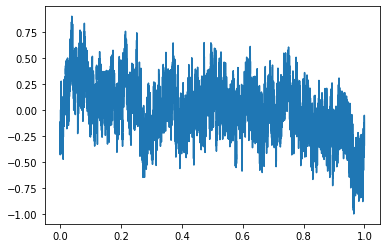

In [92]:
wave.plot()

In [93]:

wave.make_audio()

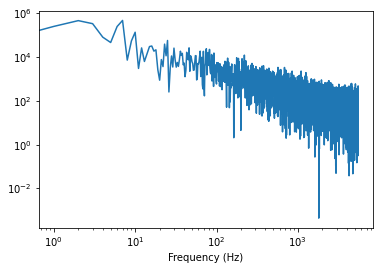

In [94]:

spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
thinkplot.config(xlabel='Frequency (Hz)',
                 xscale='log', 
                 yscale='log')

In [95]:

spectrum.estimate_slope().slope

-0.9826081561635666

In [96]:

seg_length = 64 * 1024
iters = 100
wave = thinkdsp.Wave(voss(seg_length * iters))
len(wave)

6553600

In [97]:
spectrum = bartlett_method(wave, seg_length=seg_length, win_flag=False)
spectrum.hs[0] = 0
len(spectrum)

32769

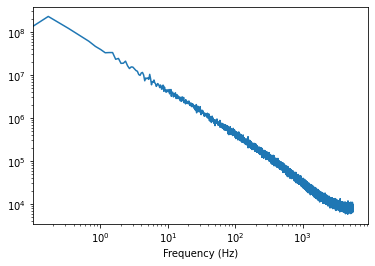

In [98]:

spectrum.plot_power()
thinkplot.config(xlabel='Frequency (Hz)',
                 xscale='log', 
                 yscale='log')

In [99]:

spectrum.estimate_slope().slope

-1.002074331348611